# 「期貨」成交價格＆成交量分析
資料來源：[期交所 期貨商買賣日報表](https://www.taifex.com.tw/cht/3/dailyFutures)

## Part 1: 讀取 期貨買賣日報表

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('20220304_TX_202203.csv', encoding = 'big5hkscs', skiprows = 1)
df

,成交價格,全市場成交量,買進期貨商代號,買進期貨商名稱,賣出期貨商代號,賣出期貨商名稱
0,17522,1,F008,統一期貨,F026,富邦期貨
1,17523,1,S585,統一證券,F020,群益期貨
2,17524,12,F002,永豐期貨,F020,群益期貨
3,,,F004,凱基期貨,F026,富邦期貨
4,,,F021,元大期貨,,
...,...,...,...,...,...,...
5959,,,,,F026,富邦期貨
5960,,,,,F029,康和期貨
5961,,,,,F030,兆豐期貨
5962,,,,,F039,大昌期貨


# Part 2: 資料處理

#### 2.1: 選取 「成交價格」, 「全市場成交量」欄位

In [22]:
df = df[['成交價格', '全市場成交量']]
df

,成交價格,全市場成交量
0,17522,1
1,17523,1
2,17524,12
3,,
4,,
...,...,...
5959,,
5960,,
5961,,
5962,,


#### 2.2: 刪除沒有資料的列

In [ ]:
df = df.drop(df[df.成交價格 == ' '].index)
df

,成交價格,全市場成交量
0,17522,1
1,17523,1
2,17524,12
6,17525,4
10,17526,7
...,...,...
5873,17784,266
5896,17785,221
5918,17786,115
5934,17787,94


#### 2.3: 資料轉型 - 把數值資料從文字改為整數

In [29]:
for row in range(len(df)):
    df.iloc[row, 1] = int(df.iloc[row, 1])

In [32]:
sum(df.全市場成交量)

118785

## Part 3: 畫出台指期成交價格＆成交量圖

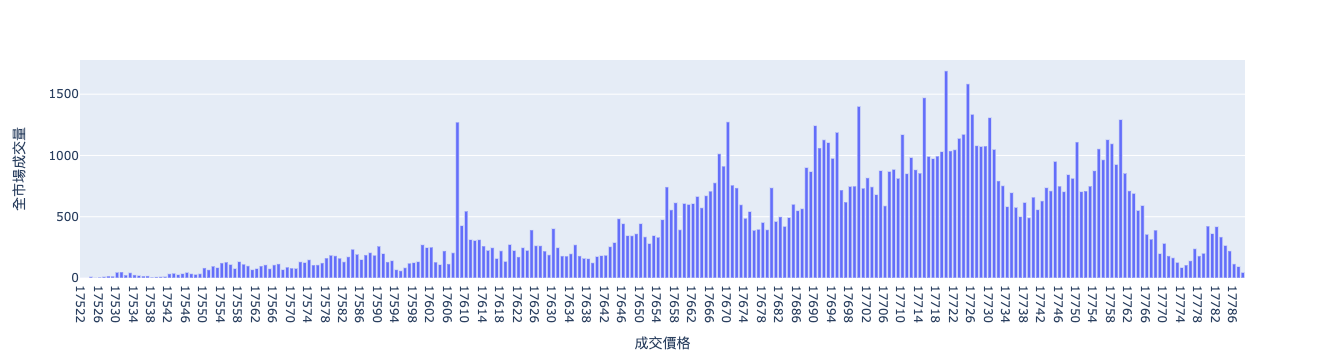

In [31]:
import plotly.express as px
fig = px.bar(df, x='成交價格', y='全市場成交量', title = '台指期成交價格＆成交量')
fig.show()